# RGB图像转换灰度图像

In [1]:
import numpy as np
import cupy as cp
import cupyx
import cv2
import string
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import  animation

In [2]:
def load_kernel(src,kname):
    _ = cp.zeros((1,)) # 初始化cuda context
    kernel = cp.core.core.compile_with_cache(src).get_function(kname)
    return kernel
def load_kernel_file(fname,kname):
    sources = None
    with open(fname,encoding='utf-8') as f:
        sources = f.read()
    kernel = load_kernel(sources,kname)
    return kernel

In [3]:
rgba_to_greyscale = load_kernel_file('../../datas/cuda/03-rgb2gray.cu','rgb2gray')

In [4]:
src = cv2.cvtColor(cv2.imread('../../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [15]:
rows,cols,ch = src.shape[0],src.shape[1],src.shape[2]
src_cu = cp.array(src).astype(cp.uint8)
dst_cu = cp.array(np.zeros((rows , cols)),dtype=cp.uint8)

In [16]:
# block=(1,1,1)
block=(32,32,1)
grid = (int(cols / block[0]),int(rows / block[1]))
print('block = ',block)
print('grid = ',grid)
rgba_to_greyscale(grid=grid,block=block,args=(src_cu,dst_cu,cp.int32(rows),cp.int32(cols)))

block =  (32, 32, 1)
grid =  (20, 15)


In [17]:
dst = dst_cu.get()
dst[dst > 255] = 255
dst[dst < 0] = 0

([], <a list of 0 Text yticklabel objects>)

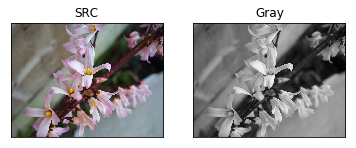

In [18]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Gray')
plt.xticks([])
plt.yticks([])